##### Localizando pontos na região de saturação para serem ajustados </h5>

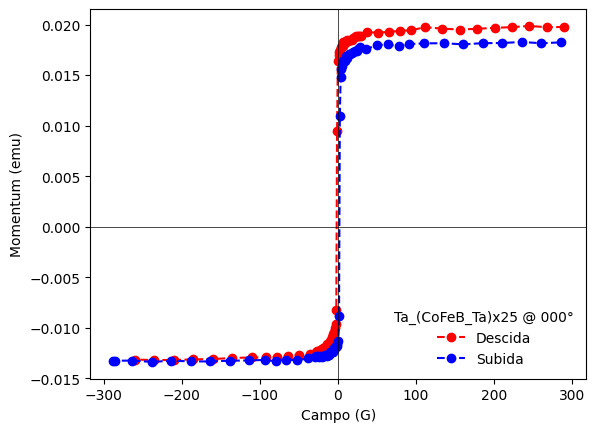

In [17]:
"""
CARREGANDO MÓDULOS NECESSÁRIOS
"""

import numpy as np #bibloteca para manipulação de arrays e aplicações matemáticas -CLEIZA #type: ignore
import matplotlib.pyplot as plt #biblioteca para plot de figuras -CLEIZA #type: ignore
import os #biblioteca para manipulação de diretórios/arquivos -CLEIZA
from caminhosDosDiretorios import diretorioDeDadosDesteDispositivo as caminhoDirDados #variavel que guarda o caminho do diretório dos arquivos de medida -ABQ
from funcoesDeNomeDeArquivo import extrairPartesDoNome, extrair_angulo, nomeConcatenadoDaAmostra #de funcoesDeNomeDeArquivo.py, chamamos aqui funcoes que extraem partes do nome do arquivo -ABQ
from funcoesDeMatrizENormalizacao import metadeDoVetor #de funcoesDeMatrizENormalizacao.py, chamamos aqui funcoes que manipulam matrizes -ABQ

"""
CHAMANDO E RECONHECENDO DADOS
"""

#subdiretorio especifico que este script vai varrer para extrair os dados especificos, neste caso, será "/dadosMenos12/". -ABQ
subdiretorioDeDadosAVarrer = caminhoDirDados+"dadosCrusMenos12/"

# Lista todos os arquivos na pasta -CLEIZA
arquivos = os.listdir(subdiretorioDeDadosAVarrer)

# Filtra apenas os arquivos .txt -CLEIZA
arquivos_txt = [arquivo for arquivo in arquivos if arquivo.endswith('.txt')]

#define o arquivo alvo do ajuste -ABQ
MEDIDA_ALVO_DO_AJUSTE = "Ta_CoFeB_Ta_x_25_000.txt"
caminho_arquivo = os.path.join(subdiretorioDeDadosAVarrer, MEDIDA_ALVO_DO_AJUSTE)

# Extrai o ângulo do nome do arquivo -CLEIZA
angulo = extrair_angulo(os.path.basename(caminho_arquivo))

# Carrega os dados do arquivo -CLEIZA
dados = np.loadtxt(caminho_arquivo)

# Extrai os dados de campo e magnetização -CLEIZA
campo = dados[:, 0]
magnetizacao = dados[:, 1]

"""
DIVIDINDO A CURVA DE HISTERESE EM DUAS (SUBIDA E DESCIDA)
"""

# Separando a curva de histerese em subida e descida-CLEIZA
campo_descida = campo[:metadeDoVetor(campo)]
magnetizacao_descida = magnetizacao[:metadeDoVetor(magnetizacao)]
campo_subida = campo[metadeDoVetor(campo):]
magnetizacao_subida = magnetizacao[metadeDoVetor(magnetizacao):]

"""
DEFININDO CARACTERÍSTICAS DA FIGURA (OPTATIVO)
"""
"""
# Define o tamanho da figura -CLEIZA
fig_size = (10, 8)

# Define o tamanho da fonte dos rótulos dos eixos x e y -CLEIZA
fonte_eixos = 14

# Define o tamanho da fonte dos títulos -CLEIZA
fonte_titulo = 16

# Define o tamanho dos números nos eixos x e y -CLEIZA
tamanho_numeros = 12

# Define o tamanho da fonte da legenda -CLEIZA
tamanho_legenda = 12

# Cria uma nova figura com tamanho definido -CLEIZA
plt.figure(figsize=fig_size)
"""
# Plota todos os pontos da curva de descida -CLEIZA
plt.plot(campo_descida, magnetizacao_descida, '--o', label='Descida', color='red')

# Plota todos os pontos da curva de subida -CLEIZA
plt.plot(campo_subida, magnetizacao_subida, '--o', label='Subida', color='blue')

# Adiciona linhas de eixo
plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA

# Adiciona grade ao gráfico (optativo)
#plt.grid(True, which='both', linestyle='-', color='gray',  linewidth=0.3)
#plt.grid(True, which='major', axis='both', color='gray', linewidth=0.3)

# Adiciona título e rótulos com tamanho de fonte personalizado -CLEIZA
plt.xlabel('Campo (G)') #optativamente, adicione aqui o argumento fontsize=fonte_eixos -ABQ
plt.ylabel('Momentum (emu)') #optativamente, adicione aqui o argumento fontsize=fonte_eixos -ABQ
plt.legend(loc = "lower right", title=f'{nomeConcatenadoDaAmostra(MEDIDA_ALVO_DO_AJUSTE)} @ {angulo}°', frameon=False)

# Define o tamanho dos números nos eixos x e y (optativo) -CLEIZA
#plt.tick_params(axis='both', which='major', labelsize=tamanho_numeros)


"""
DESTACANDO NA FIGURA PONTOS INDENTIFICADOS ANTERIORMENTE
"""
"""
# Identificação dos X primeiros e X últimos pontos da curva de subida -CLEIZA
plt.scatter(campo_subida[:4], magnetizacao_subida[:4], color='blue', s=100, edgecolors='black', zorder=5)
plt.scatter(campo_subida[-6:], magnetizacao_subida[-6:], color='blue', s=100, edgecolors='black', zorder=5)

# Identificação dos X primeiros e X últimos pontos da curva de descida -CLEIZA
plt.scatter(campo_descida[:7], magnetizacao_descida[:7], color='red', s=100, edgecolors='black', zorder=5)
plt.scatter(campo_descida[-5:], magnetizacao_descida[-5:], color='red', s=100, edgecolors='black', zorder=5)
"""
# Exibe o gráfico -CLEIZA
plt.show()


##### Tratamento de acordo com a necessidade

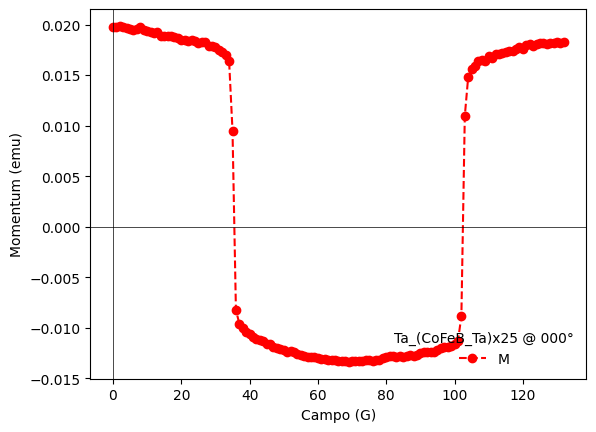

In [21]:

#declara-se aqui a constante para a quantidade de pontos que serão utilizados para calcular as médias. altere o valor dessa constante conforme adequar-se à curva crua -ABQ
QNT_PONTOS = int(12) #explicitar a tipagem "int()" é redundante, pois o valor já é um inteiro e o python entende esta declaração em letras maiúsculas como uma constante,, ainda assim, pra evitar loucuras pythonicas, explicitamos aqui -ABQ

tamCampo = len(campo)

"""
# Define o tamanho da figura -CLEIZA
fig_size = (10, 8)

# Define o tamanho da fonte dos rótulos dos eixos x e y -CLEIZA
fonte_eixos = 14

# Define o tamanho da fonte dos títulos -CLEIZA
fonte_titulo = 16

# Define o tamanho dos números nos eixos x e y -CLEIZA
tamanho_numeros = 12

# Define o tamanho da fonte da legenda -CLEIZA
tamanho_legenda = 12

# Cria uma nova figura com tamanho definido -CLEIZA
plt.figure(figsize=fig_size)
"""

# Plota todos os pontos da curva de histerese com as substituições -CLEIZA
# Plota todos os pontos da curva de descida -CLEIZA
plt.plot(range(tamCampo), magnetizacao, '--o', label='Descida', color='red')

# Plota todos os pontos da curva de subida -CLEIZA
#plt.plot(campo_subida, magnetizacaoSubidaCopia, '--o', label='Subida', color='blue')

# Adiciona linhas de eixo -CLEIZA
plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA


# Adiciona grade ao gráfico (optativo)
#plt.grid(True, which='both', linestyle='-', color='gray',  linewidth=0.3)
#plt.grid(True, which='major', axis='both', color='gray', linewidth=0.3)

# Adiciona Rótulos com tamanho de fonte personalizado -CLEIZA
plt.xlabel('Campo (G)') #optativamente, adicione aqui o argumento "fontsize=fonte_eixos" -ABQ
plt.ylabel('Momentum (emu)') #optativamente, adicione aqui o argumento "fontsize=fonte_eixos" -ABQ
plt.legend(["M"], loc="lower right", title=f'{nomeConcatenadoDaAmostra(MEDIDA_ALVO_DO_AJUSTE)} @ {angulo}°', frameon=False) #optativamente, adicione aqui o argumento fontsize=fonte_titulo -ABQ

# Define o tamanho dos números nos eixos x e y (optativo) -CLEIZA
#plt.tick_params(axis='both', which='major', labelsize=tamanho_numeros)

# Adiciona legenda com tamanho de fonte personalizado -CLEIZA
#plt.legend(fontsize=tamanho_legenda) -CLEIZA

# Exibe o gráfico -CLEIZA
plt.show()


##### Salvando um novo .txt com os dados ajustados
Cria-se um novo diretório dentro do diretório mãe diretorioDados contendo os dados ajustados para drift, que serão conjuntamente colocados com dados que não necessitaram ser ajustados e normalizados posteriormente

In [9]:
# Caminho onde deseja salvar o novo arquivo .txt -CLEIZA
#subdiretorioDeDadosANormalizar = caminhoDirDados+"dadosANormalizar/"

# Obtém o nome do arquivo original sem o diretório
#nome_arquivo_original = os.path.basename(caminho_arquivo)

# Define o novo nome do arquivo inicial com "Ajustado" no início
#novo_nome_arquivo = f"Ajustado_{nome_arquivo_original}"

# Salva os dados substituídos como um novo arquivo .txt com o nome "Ajustado" no início
#novo_caminho_arquivo = os.path.join(subdiretorioDeDadosANormalizar, novo_nome_arquivo)
#np.savetxt(novo_caminho_arquivo, np.column_stack((campo, magnetizacaoAjustada)), delimiter='\t', header='Campo (G)\tMomentum (emu)', comments='')

#print(f'Os dados substituídos foram salvos no arquivo: {novo_caminho_arquivo}')